In [1]:
import numpy as np
from quantumoperators import *
import matplotlib.pyplot as plt
from hamiltonianoperators import *

In [2]:
def set_fontsize(ax, fs):
    """
    Small function to set font sizes for figures
    """
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.tick_params(axis='both', which='minor', labelsize=fs)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    ax.yaxis.offsetText.set_fontsize(fs)
    ax.title.set_size(fs)

In [3]:
Ham = Hamiltonian(6,0.5,0.5)

In [4]:
lines_idx = {'L':4, 'I':5, 'K':6, 'J':7, 'F':8, 'G':9, 'E':10, 'H':11, 'D':12, 'A':13, 'C':14, 'B':15}
transitions = [('J', 'E'), ('K', 'H'), ('I', 'F'), ('I', 'G'), ('L', 'F'), ('L', 'G'), 
               ('F', 'H'), ('G', 'E'), ('J', 'F'), ('K', 'G'), ('L','I')]

In [5]:
# states and qns for J=1 states, lists the amplitude sign difference for superposition states
# taken from Hinds (1991)
lines = {'A': {'qns': (1,0,-0.5,-0.5)}, 'D': {'qns': (1,0,+0.5,+0.5)}, 'E': {'qns': (1,-1,-0.5,-0.5)}, 
         'F': {'qns': (1,+1,+0.5,-0.5)}, 'G': {'qns':(1,-1,-0.5,+0.5)}, 'H': {'qns':(1,+1,+0.5,+0.5)}, 
         'J': {'qns': (1,-1,+0.5,-0.5)}, 'K': {'qns': (1,+1,-0.5,+0.5)}, 
         'I': {'qns': [(1,+1,-0.5,-0.5), (1,-1,+0.5,+0.5)], 'amp': +1}, 
         'L': {'qns': [(1,+1,-0.5,-0.5), (1,-1,+0.5,+0.5)], 'amp': -1},
         'B': {'qns': [(1,+0,+0.5,-0.5), (1,+0,-0.5,+0.5)], 'amp': -1},
         'C': {'qns': [(1,+0,+0.5,-0.5), (1,+0,-0.5,+0.5)], 'amp': 1},}

In [6]:
states = Ham.eigenstates(0,0,30e3,0,0,0,1e-1)

In [7]:
import collections 

def check_level_match(state, level):
    # check superposition state
    if isinstance(level.get('qns'), list):
        amps = [s[0] for s in state.data[-2:]]
       # check if amplitudes are sufficiently close to each other
        if np.abs(amps[0]) - np.abs(amps[1]) < 1e-12:
            # check amplitude sign difference
            if level.get('amp') == np.sign(np.product(amps)):
                qns_state = tuple((s[1].mJ, s[1].m1, s[1].m2) for s in state.data[-2:])
                qns_level = tuple(l[1:] for l in level.get('qns'))
                if collections.Counter(qns_state) == collections.Counter(qns_level):
                    return True
                
     # check single state
    else:
        s = state.data[-1][1]
        qns_state = (s.mJ, s.m1, s.m2)
        if qns_state == level.get('qns')[1:]:
            return True
    return False

In [8]:
import collections 

def get_state_identity(states, lines, Jselect = 1):

    states_idx = {}

    # Indices of eigenvalues with same J don't overlap other J levels untill ~60kV/cmd
    # so can use the indices to select J states until that point
    Jstart = (4*(2*(Jselect-1)+1))
    Jstop = Jstart + 4*(2*Jselect + 1)
    
    for idx, state in enumerate(states[1]):
        # selection J state
        if (idx >= Jstart) & (idx < Jstop):
            for line, dat in lines.items():
                if check_level_match(state, dat):
                    states_idx[line] = idx
                    break
    return states_idx

states_idx = get_state_identity(states, lines, Jselect = 1)
states_idx

{'L': 4,
 'I': 5,
 'J': 6,
 'K': 7,
 'F': 8,
 'G': 9,
 'H': 10,
 'E': 11,
 'C': 12,
 'A': 13,
 'D': 14,
 'B': 15}

In [9]:
for line, idx in states_idx.items():
    print('='*25)
    print(f'{idx:2} {line}')
    print('='*25)
    state = states[1][idx]
    for dat in state.data:
            J = dat[1].J
            mJ = dat[1].mJ
            m1 = dat[1].m1
            m2 = dat[1].m2
            print(f'{dat[0].real:+5.2f} : {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')
    print('*'*25)
    for label, l in lines.items():
        if check_level_match(state, l):
            print(label)
    data = lines[line].get('qns')
    if isinstance(data, list):
        for dat in data:
            J, mJ,m1,m2 = dat
            print(f'{"":7} {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')
    else:
        J, mJ,m1,m2 = data
        print(f'{"":7} {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')

 4 L
+0.29 : +3 +1 -0.5 -0.5
-0.29 : +3 -1 +0.5 +0.5
+0.77 : +2 +1 -0.5 -0.5
-0.77 : +2 -1 +0.5 +0.5
+1.00 : +1 +1 -0.5 -0.5
-1.00 : +1 -1 +0.5 +0.5
*************************
L
        +1 +1 -0.5 -0.5
        +1 -1 +0.5 +0.5
 5 I
+0.29 : +3 -1 +0.5 +0.5
+0.29 : +3 +1 -0.5 -0.5
+0.77 : +2 -1 +0.5 +0.5
+0.77 : +2 +1 -0.5 -0.5
+1.00 : +1 -1 +0.5 +0.5
+1.00 : +1 +1 -0.5 -0.5
*************************
I
        +1 +1 -0.5 -0.5
        +1 -1 +0.5 +0.5
 6 J
+0.29 : +3 -1 +0.5 -0.5
+0.77 : +2 -1 +0.5 -0.5
+1.00 : +1 -1 +0.5 -0.5
*************************
J
        +1 -1 +0.5 -0.5
 7 K
-0.29 : +3 +1 -0.5 +0.5
-0.77 : +2 +1 -0.5 +0.5
-1.00 : +1 +1 -0.5 +0.5
*************************
K
        +1 +1 -0.5 +0.5
 8 F
+0.29 : +3 +1 +0.5 -0.5
+0.77 : +2 +1 +0.5 -0.5
+1.00 : +1 +1 +0.5 -0.5
*************************
F
        +1 +1 +0.5 -0.5
 9 G
+0.29 : +3 -1 -0.5 +0.5
+0.77 : +2 -1 -0.5 +0.5
+1.00 : +1 -1 -0.5 +0.5
*************************
G
        +1 -1 -0.5 +0.5
10 H
+0.11 : +2 -1 -0.5 -0.5
+0.15

## Check $B_z$ Dependence

In [10]:
Bx = np.linspace(-50e-3,50e-3,101)
By = np.linspace(-50e-3,50e-3,101)
Bz = np.linspace(-50e-3,50e-3,101)

Ex = np.zeros(len(Bx))
Ey = np.zeros(len(Bx))
Ez = np.ones(len(Bx))*30e3

spectra = {'Bz':Ham.spectrum(Ex,Ey,Ez,Ex,Ex,Bz)}

In [11]:
transitions = [('J', 'E'), ('K', 'H'), ('K','E'), ('J', 'H'), ('J', 'F'), ('K', 'G'), ('K', 'F'), ('J', 'G'),
               ('G', 'E'), ('F', 'H'), ('F', 'E'), ('G', 'H'), ('I','J'), ('I','K'), ('L','J'), ('L','K'), ('L', 'I')]

states = Ham.eigenstates(0,0,30e3,0,0,0,1e-1)

for l,u in transitions:
    l_idx, u_idx = states_idx[l], states_idx[u]
    print(f'{l}->{u} : {(states[0][u_idx] - states[0][l_idx])/1e3:.3f} kHz')

J->E : 119.517 kHz
K->H : 119.517 kHz
K->E : 119.517 kHz
J->H : 119.517 kHz
J->F : 108.924 kHz
K->G : 108.924 kHz
K->F : 108.924 kHz
J->G : 108.924 kHz
G->E : 10.593 kHz
F->H : 10.593 kHz
F->E : 10.593 kHz
G->H : 10.593 kHz
I->J : 22.780 kHz
I->K : 22.780 kHz
L->J : 26.025 kHz
L->K : 26.025 kHz
L->I : 3.245 kHz


In [12]:
transitions = [('J', 'E'), ('K', 'H'), ('K','E'), ('J', 'H'), ('J', 'F'), ('K', 'G'), ('K', 'F'), ('J', 'G'),
               ('G', 'E'), ('F', 'H'), ('F', 'E'), ('G', 'H')]

In [13]:
results = {B:{transition: [] for transition in transitions} for B in spectra.keys()}

for B, spectrum in spectra.items():
    for Bi in eval(B):
        if B == 'Bx':
            states = Ham.eigenstates(0,0,30e3,Bi,0,0,1e-1)
        elif B == 'By':
            states = Ham.eigenstates(0,0,30e3,0,Bi,0,1e-1)
        elif B == 'Bz':
            states = Ham.eigenstates(0,0,30e3,0,0,Bi,1e-1)
        states_idx = {}

        Jselect = 1

        # Indices of eigenvalues with same J don't overlap other J levels untill ~60kV/cmd
        # so can use the indices to select J states until that point
        Jstart = (4*(2*(Jselect-1)+1))
        Jstop = Jstart + 4*(2*Jselect + 1)

        for idx, state in enumerate(states[1]):
            # selection J state
            if (idx >= Jstart) & (idx < Jstop):
                for line, dat in lines.items():
                    # check superposition state
                    if check_level_match(state, lines[line]):
                        states_idx[line] = idx
                        break
        for l,u in transitions:
            l_idx, u_idx = states_idx[l], states_idx[u]
            results[B][(l,u)].append(states[0][u_idx]-states[0][l_idx])

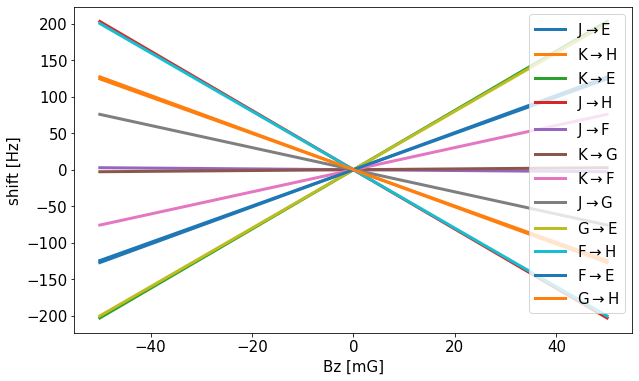

In [14]:
for B, data in results.items():
    fig, ax = plt.subplots(figsize = (10,6))
    for transition in transitions:
        ax.plot(Bx*1e3, data[transition]-data[transition][len(Bx)//2], lw = 3, 
                label = f'{transition[0]}'+r'$\rightarrow$'+f'{transition[1]}')
    ax.set_xlabel(f'{B} [mG]')
    ax.set_ylabel(f'shift [Hz]')
    ax.legend(fontsize = 15)
    set_fontsize(ax, 15)

In [15]:
shift_coefficients = {B:{} for B in spectra.keys()}

for B, data in results.items():
    for transition in transitions:
        dat = data[transition]-data[transition][len(Bx)//2]
        if B != 'Bz':
            coeff = np.linalg.lstsq((Bx**2)[:,np.newaxis], dat, rcond=0)[0]
        else:
            coeff = np.linalg.lstsq(Bx[:,np.newaxis], dat, rcond=0)[0]
        shift_coefficients[B][transition] = coeff[0]

In [16]:
for B in shift_coefficients.keys():
    print('='*25)
    print(B)
    print('='*25)
    for transition, shift in shift_coefficients[B].items():
        l,u = transition
        if B == 'Bz':
            print(f'{l}->{u} : {shift/1e3:+5.2f} mHz/mG')
        else:
            print(f'{l}->{u}: {shift/1e3:+.2e} mHz/muG^2')

Bz
J->E : +2.49 mHz/mG
K->H : -2.49 mHz/mG
K->E : +4.06 mHz/mG
J->H : -4.06 mHz/mG
J->F : -0.06 mHz/mG
K->G : +0.06 mHz/mG
K->F : +1.52 mHz/mG
J->G : -1.52 mHz/mG
G->E : +4.00 mHz/mG
F->H : -4.00 mHz/mG
F->E : +2.54 mHz/mG
G->H : -2.54 mHz/mG


In [17]:
labels_basis = []
for idx in range(4,16):
    s = Ham.QN[idx]
    labels_basis.append(f'|{s.J}, {s.mJ:2}, {s.m1:4}, {s.m2:4}>')
    print(f'{idx:2} : |{s.J}, {s.mJ:2}, {s.m1:4}, {s.m2:4}>')

 4 : |1, -1, -0.5, -0.5>
 5 : |1, -1, -0.5,  0.5>
 6 : |1, -1,  0.5, -0.5>
 7 : |1, -1,  0.5,  0.5>
 8 : |1,  0, -0.5, -0.5>
 9 : |1,  0, -0.5,  0.5>
10 : |1,  0,  0.5, -0.5>
11 : |1,  0,  0.5,  0.5>
12 : |1,  1, -0.5, -0.5>
13 : |1,  1, -0.5,  0.5>
14 : |1,  1,  0.5, -0.5>
15 : |1,  1,  0.5,  0.5>


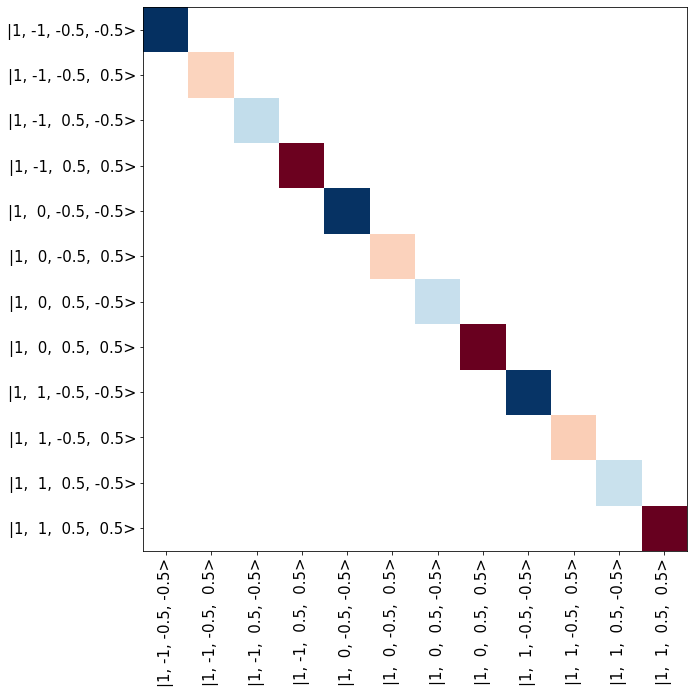

In [18]:
H = Ham.HZz_m[4:16,4:16].real
H = np.ma.masked_where(H == 0, H)

fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(H, extent = [4,16,16,4], cmap=plt.get_cmap('RdBu'))

ax.set_xticks(np.arange(4,16)+0.5)
ax.set_xticklabels(labels_basis, rotation = 'vertical')
ax.set_yticks(np.arange(4,16)+0.5)
ax.set_yticklabels(labels_basis)

set_fontsize(ax, 15)

## Check $B_x,~B_y$ Dependence

In [19]:
states = Ham.eigenstates(0,0,30e3,1e-3,0,0,1e-1)
states_idx = get_state_identity(states, lines, Jselect = 1)

In [20]:
states_idx

{'L': 4,
 'I': 5,
 'K': 6,
 'J': 7,
 'G': 8,
 'F': 9,
 'E': 10,
 'H': 11,
 'C': 12,
 'D': 13,
 'A': 14,
 'B': 15}

In [21]:
states = Ham.eigenstates(0,0,30e3,50e-3,0,0,1e-1)

for line, idx in states_idx.items():
    print('='*25)
    print(f'{idx:2} {line}')
    print('='*25)
    state = states[1][idx]
    for dat in state.data:
            J = dat[1].J
            mJ = dat[1].mJ
            m1 = dat[1].m1
            m2 = dat[1].m2
            print(f'{dat[0].real:+5.2f} : {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')
    print('*'*25)
    for label, l in lines.items():
        if check_level_match(state, l):
            print(label)
    data = lines[line].get('qns')
    if isinstance(data, list):
        for dat in data:
            J, mJ,m1,m2 = dat
            print(f'{"":7} {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')
    else:
        J, mJ,m1,m2 = data
        print(f'{"":7} {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')

 4 L
+0.29 : +3 +1 -0.5 -0.5
-0.29 : +3 -1 +0.5 +0.5
+0.77 : +2 +1 -0.5 -0.5
-0.77 : +2 -1 +0.5 +0.5
+1.00 : +1 +1 -0.5 -0.5
-1.00 : +1 -1 +0.5 +0.5
*************************
L
        +1 +1 -0.5 -0.5
        +1 -1 +0.5 +0.5
 5 I
+0.29 : +3 -1 +0.5 +0.5
+0.29 : +3 +1 -0.5 -0.5
+0.77 : +2 -1 +0.5 +0.5
+0.77 : +2 +1 -0.5 -0.5
+1.00 : +1 -1 +0.5 +0.5
+1.00 : +1 +1 -0.5 -0.5
*************************
I
        +1 +1 -0.5 -0.5
        +1 -1 +0.5 +0.5
 6 K
-0.29 : +3 -1 +0.5 -0.5
+0.29 : +3 +1 -0.5 +0.5
-0.76 : +2 -1 +0.5 -0.5
+0.77 : +2 +1 -0.5 +0.5
-1.00 : +1 -1 +0.5 -0.5
+1.00 : +1 +1 -0.5 +0.5
*************************
K
        +1 +1 -0.5 +0.5
 7 J
+0.29 : +3 +1 -0.5 +0.5
+0.29 : +3 -1 +0.5 -0.5
+0.76 : +2 +1 -0.5 +0.5
+0.77 : +2 -1 +0.5 -0.5
+1.00 : +1 +1 -0.5 +0.5
+1.00 : +1 -1 +0.5 -0.5
*************************
J
        +1 -1 +0.5 -0.5
 8 G
+0.26 : +3 +1 +0.5 -0.5
-0.29 : +3 -1 -0.5 +0.5
+0.69 : +2 +1 +0.5 -0.5
-0.77 : +2 -1 -0.5 +0.5
+0.90 : +1 +1 +0.5 -0.5
-1.00 : +1 -1 -0.5 +0.5

For magnetic fields exceeding 100 mG the states start mixing sufficiently that the quantum numbers cannot be used to distinguish the levels, however they don't swap the ordering so the states at 1 mG magnetic field can be employed to calculate the shifts.

In [22]:
Bx = np.linspace(-50e-3,50e-3,101)
By = np.linspace(-50e-3,50e-3,101)
Bz = np.linspace(-50e-3,50e-3,101)

Ex = np.zeros(len(Bx))
Ey = np.zeros(len(Bx))
Ez = np.ones(len(Bx))*30e3

spectra = {'Bx':Ham.spectrum(Ex,Ey,Ez,Bx,Ex,Ex),
           'By':Ham.spectrum(Ex,Ey,Ez,Ex,By,Ex)}

In [23]:
import collections 

results = {B:{transition:None for transition in transitions} for B in spectra.keys()}


for B, spectrum in spectra.items():
    for l,u in transitions:
        l_idx, u_idx = states_idx[l], states_idx[u]
        results[B][(l,u)] = (spectrum[0][:,u_idx]-spectrum[0][:,l_idx])

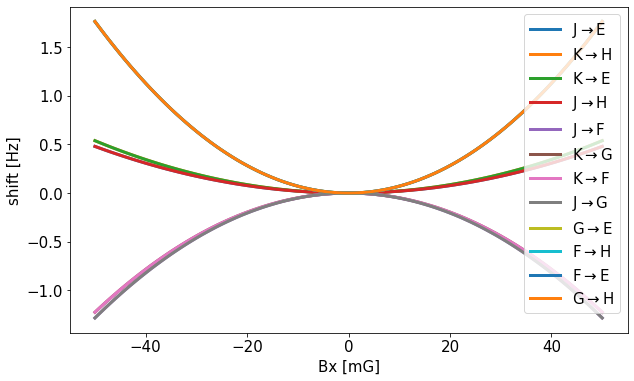

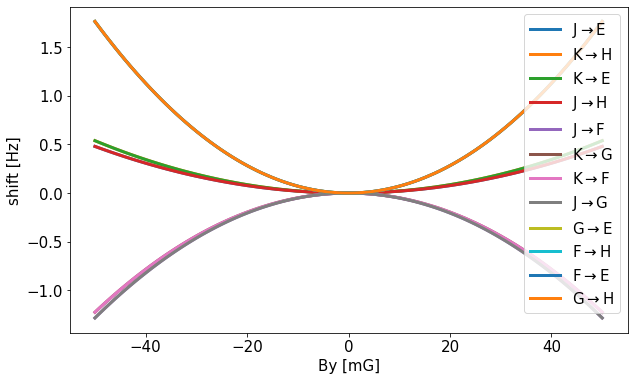

In [24]:
for B, data in results.items():
    fig, ax = plt.subplots(figsize = (10,6))
    for transition in transitions:
        ax.plot(Bx*1e3, data[transition]-data[transition][len(Bx)//2], lw = 3, 
                label = f'{transition[0]}'+r'$\rightarrow$'+f'{transition[1]}')
    ax.set_xlabel(f'{B} [mG]')
    ax.set_ylabel(f'shift [Hz]')
    ax.legend(fontsize = 15)
    set_fontsize(ax, 15)

In [25]:
shift_coefficients = {B:{} for B in spectra.keys()}

for B, data in results.items():
    for transition in transitions:
        dat = data[transition]-data[transition][len(Bx)//2]
        if B != 'Bz':
            coeff = np.linalg.lstsq((Bx**2)[:,np.newaxis], dat, rcond=0)[0]
        else:
            coeff = np.linalg.lstsq(Bx[:,np.newaxis], dat, rcond=0)[0]
        shift_coefficients[B][transition] = coeff[0]

In [26]:
for B in shift_coefficients.keys():
    print('='*25)
    print(B)
    print('='*25)
    for transition, shift in shift_coefficients[B].items():
        l,u = transition
        if B == 'Bz':
            print(f'{l}->{u} : {shift/1e3:+5.2f} mHz/mG')
        else:
            print(f'{l}->{u}: {shift/1e3:+.2e} mHz/mG^2')

Bx
J->E: +1.92e-01 mHz/mG^2
K->H: +2.16e-01 mHz/mG^2
K->E: +2.15e-01 mHz/mG^2
J->H: +1.92e-01 mHz/mG^2
J->F: -5.14e-01 mHz/mG^2
K->G: -4.91e-01 mHz/mG^2
K->F: -4.91e-01 mHz/mG^2
J->G: -5.14e-01 mHz/mG^2
G->E: +7.06e-01 mHz/mG^2
F->H: +7.06e-01 mHz/mG^2
F->E: +7.06e-01 mHz/mG^2
G->H: +7.06e-01 mHz/mG^2
By
J->E: +1.92e-01 mHz/mG^2
K->H: +2.16e-01 mHz/mG^2
K->E: +2.15e-01 mHz/mG^2
J->H: +1.92e-01 mHz/mG^2
J->F: -5.14e-01 mHz/mG^2
K->G: -4.91e-01 mHz/mG^2
K->F: -4.91e-01 mHz/mG^2
J->G: -5.14e-01 mHz/mG^2
G->E: +7.06e-01 mHz/mG^2
F->H: +7.06e-01 mHz/mG^2
F->E: +7.06e-01 mHz/mG^2
G->H: +7.06e-01 mHz/mG^2


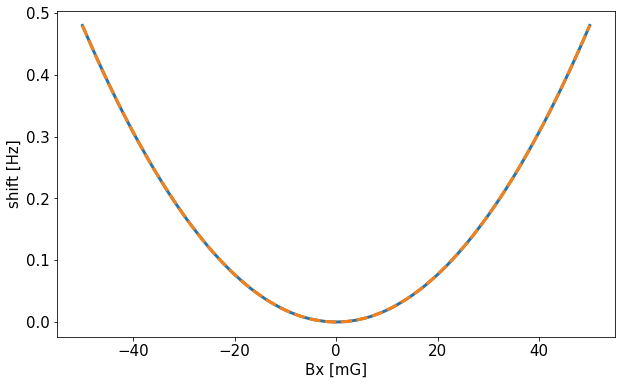

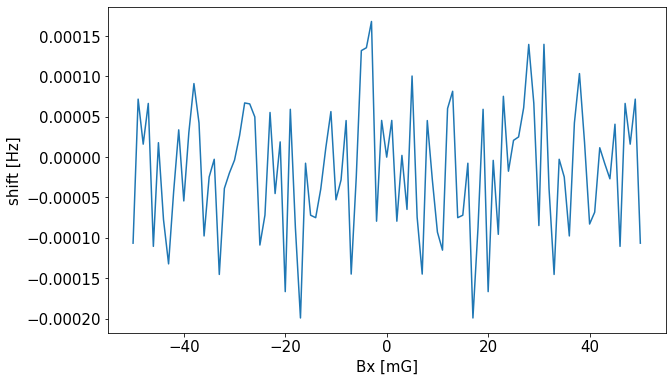

In [27]:
transition = ('J', 'E')

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(Bx*1e3, data[transition]-data[transition][len(Bx)//2], lw = 3)
ax.plot(Bx*1e3, shift_coefficients['Bx'][transition] * Bx**2, '--', lw = 3)

ax.set_xlabel('Bx [mG]')
ax.set_ylabel('shift [Hz]')

set_fontsize(ax, 15)

transition = ('J', 'E')

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(Bx*1e3, data[transition]-data[transition][len(Bx)//2]- shift_coefficients['Bx'][transition] * Bx**2)

ax.set_xlabel('Bx [mG]')
ax.set_ylabel('shift [Hz]')

set_fontsize(ax, 15)

## Check $E_x, E_y, E_z$ Dependence

In [28]:
states = Ham.eigenstates(-100,0,30e3,0,0,0,1e-1)
states_idx = get_state_identity(states, lines, Jselect = 1)

In [29]:
states = Ham.eigenstates(100,0,30e3,0,0,0,1e-1)

for line, idx in states_idx.items():
    print('='*25)
    print(f'{idx:2} {line}')
    print('='*25)
    state = states[1][idx]
    for dat in state.data:
            J = dat[1].J
            mJ = dat[1].mJ
            m1 = dat[1].m1
            m2 = dat[1].m2
            print(f'{dat[0].real:+5.2f} : {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')
    print('*'*25)
    for label, l in lines.items():
        if check_level_match(state, l):
            print(label)
    data = lines[line].get('qns')
    if isinstance(data, list):
        for dat in data:
            J, mJ,m1,m2 = dat
            print(f'{"":7} {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')
    else:
        J, mJ,m1,m2 = data
        print(f'{"":7} {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')

 4 L
+0.29 : +3 -1 +0.5 +0.5
-0.29 : +3 +1 -0.5 -0.5
+0.77 : +2 -1 +0.5 +0.5
-0.77 : +2 +1 -0.5 -0.5
+1.00 : +1 -1 +0.5 +0.5
-1.00 : +1 +1 -0.5 -0.5
*************************
L
        +1 +1 -0.5 -0.5
        +1 -1 +0.5 +0.5
 5 I
+0.29 : +3 +1 -0.5 -0.5
+0.29 : +3 -1 +0.5 +0.5
+0.77 : +2 +1 -0.5 -0.5
+0.77 : +2 -1 +0.5 +0.5
+1.00 : +1 +1 -0.5 -0.5
+1.00 : +1 -1 +0.5 +0.5
*************************
I
        +1 +1 -0.5 -0.5
        +1 -1 +0.5 +0.5
 6 K
+0.29 : +3 +1 -0.5 +0.5
+0.77 : +2 +1 -0.5 +0.5
+1.00 : +1 +1 -0.5 +0.5
*************************
K
        +1 +1 -0.5 +0.5
 7 J
+0.29 : +3 -1 +0.5 -0.5
+0.77 : +2 -1 +0.5 -0.5
+1.00 : +1 -1 +0.5 -0.5
*************************
J
        +1 -1 +0.5 -0.5
 8 F
+0.29 : +3 -1 -0.5 +0.5
+0.77 : +2 -1 -0.5 +0.5
+1.00 : +1 -1 -0.5 +0.5
*************************
G
        +1 +1 +0.5 -0.5
 9 G
+0.29 : +3 +1 +0.5 -0.5
+0.77 : +2 +1 +0.5 -0.5
+1.00 : +1 +1 +0.5 -0.5
*************************
F
        +1 -1 -0.5 +0.5
10 E
-0.16 : +3 +1 +0.5 +0.5
+0.29

In [30]:
Ez = np.ones(101)*30e3
zo = np.zeros(101)

Ex_shift = np.linspace(-0.2,0.2,101)*1e3
Ey_shift = np.linspace(-0.2,0.2,101)*1e3
Ez_shift = np.linspace(-0.2,0.2,101)*1e3

spectra = {'Ez':Ham.spectrum(zo,zo,Ez+Ez_shift,zo,zo,zo),
           'Ex':Ham.spectrum(zo+Ex_shift,Ey,Ez,zo,zo,zo),
           'Ey':Ham.spectrum(zo,zo+Ey_shift,Ez,zo,zo,zo)}

In [31]:
import collections 

results = {E:{transition: [] for transition in transitions} for E in spectra.keys()}


for E, spectrum in spectra.items():
    for Ei in eval(E+'_shift'):
        if E == 'Ex':
            states = Ham.eigenstates(Ei,0,30e3,0,0,0,1e-1)
        elif E == 'Ey':
            states = Ham.eigenstates(0,Ei,30e3,0,0,0,1e-1)
        elif E == 'Ez':
            states = Ham.eigenstates(0,0,30e3+Ei,0,0,0,1e-1)
        states_idx = {}

        Jselect = 1

        # Indices of eigenvalues with same J don't overlap other J levels untill ~60kV/cmd
        # so can use the indices to select J states until that point
        Jstart = (4*(2*(Jselect-1)+1))
        Jstop = Jstart + 4*(2*Jselect + 1)

        for idx, state in enumerate(states[1]):
            # selection J state
            if (idx >= Jstart) & (idx < Jstop):
                for line, dat in lines.items():
                    if check_level_match(state, lines[line]):
                        states_idx[line] = idx
                        break
        for l,u in transitions:
            l_idx, u_idx = states_idx[l], states_idx[u]
            results[E][(l,u)].append(states[0][u_idx]-states[0][l_idx])

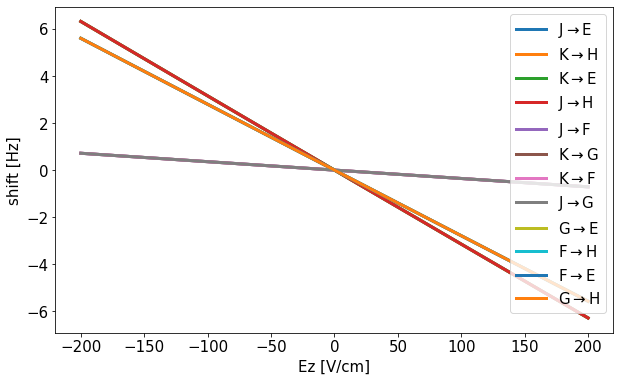

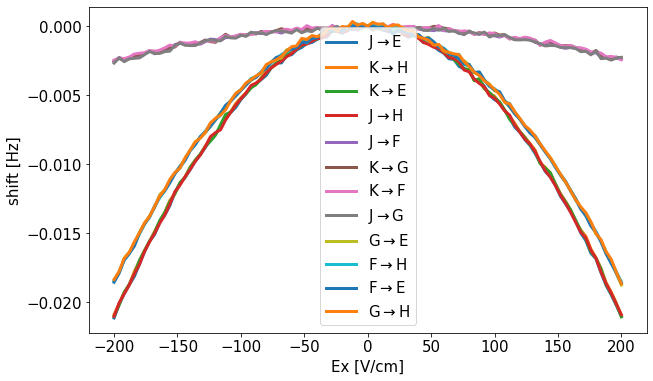

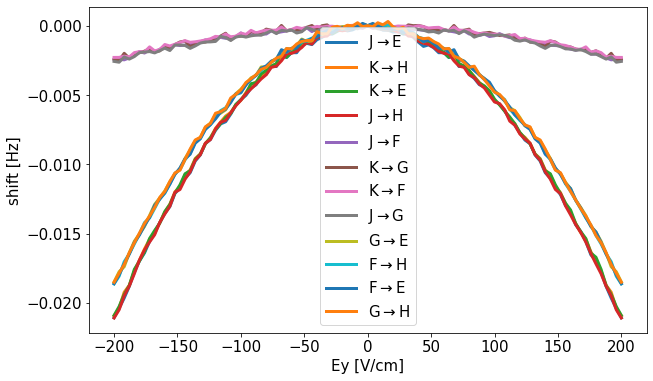

In [32]:
for E, data in results.items():
    fig, ax = plt.subplots(figsize = (10,6))
    for transition in transitions:
        ax.plot(Ez_shift, data[transition]-data[transition][len(Ez_shift)//2], lw = 3, 
                label = f'{transition[0]}'+r'$\rightarrow$'+f'{transition[1]}')
    ax.set_xlabel(f'{E} [V/cm]')
    ax.set_ylabel(f'shift [Hz]')
    ax.legend(fontsize = 15)
    set_fontsize(ax, 15)

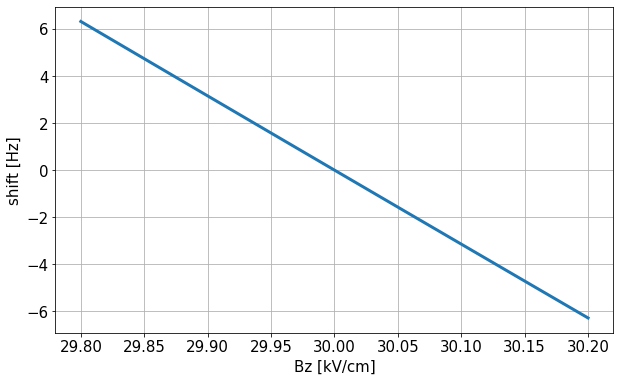

In [33]:
data = Ham.spectrum(zo,zo,Ez+Ez_shift,zo,zo,zo)[0]

fig, ax = plt.subplots(figsize = (10,6))

ax.plot((Ez+Ez_shift)/1e3, data[:,10]-data[:,7] - (data[len(data)//2,10]-data[len(data)//2,7]), lw = 3)
ax.grid(True)
ax.set_xlabel('Bz [kV/cm]')
ax.set_ylabel('shift [Hz]')
set_fontsize(ax, 15)

In [34]:
shift_coefficients = {E:{} for E in spectra.keys()}

for E, data in results.items():
    for transition in transitions:
        dat = data[transition]-data[transition][len(Ez_shift)//2]
        if E != 'Ez':
            coeff = np.linalg.lstsq((Ex_shift**2)[:,np.newaxis], dat, rcond=0)[0]
        else:
            coeff = np.linalg.lstsq(Ez_shift[:,np.newaxis], dat, rcond=0)[0]
        shift_coefficients[E][transition] = coeff[0]

In [35]:
for E in shift_coefficients.keys():
    print('='*25)
    print(E)
    print('='*25)
    for transition, shift in shift_coefficients[E].items():
        l,u = transition
        if E == 'Ez':
            print(f'{l}->{u} : {shift*1e3:+6.2f} mHz/(V/cm)')
        else:
            print(f'{l}->{u}: {shift*1e3:+.2e} mHz/(V/cm)^2')

Ez
J->E : -31.50 mHz/(V/cm)
K->H : -31.50 mHz/(V/cm)
K->E : -31.50 mHz/(V/cm)
J->H : -31.50 mHz/(V/cm)
J->F :  -3.57 mHz/(V/cm)
K->G :  -3.57 mHz/(V/cm)
K->F :  -3.57 mHz/(V/cm)
J->G :  -3.57 mHz/(V/cm)
G->E : -27.93 mHz/(V/cm)
F->H : -27.93 mHz/(V/cm)
F->E : -27.93 mHz/(V/cm)
G->H : -27.93 mHz/(V/cm)
Ex
J->E: -5.29e-04 mHz/(V/cm)^2
K->H: -5.24e-04 mHz/(V/cm)^2
K->E: -5.25e-04 mHz/(V/cm)^2
J->H: -5.27e-04 mHz/(V/cm)^2
J->F: -6.42e-05 mHz/(V/cm)^2
K->G: -6.22e-05 mHz/(V/cm)^2
K->F: -6.05e-05 mHz/(V/cm)^2
J->G: -6.58e-05 mHz/(V/cm)^2
G->E: -4.63e-04 mHz/(V/cm)^2
F->H: -4.63e-04 mHz/(V/cm)^2
F->E: -4.65e-04 mHz/(V/cm)^2
G->H: -4.61e-04 mHz/(V/cm)^2
Ey
J->E: -5.30e-04 mHz/(V/cm)^2
K->H: -5.25e-04 mHz/(V/cm)^2
K->E: -5.25e-04 mHz/(V/cm)^2
J->H: -5.31e-04 mHz/(V/cm)^2
J->F: -6.46e-05 mHz/(V/cm)^2
K->G: -6.20e-05 mHz/(V/cm)^2
K->F: -5.92e-05 mHz/(V/cm)^2
J->G: -6.74e-05 mHz/(V/cm)^2
G->E: -4.63e-04 mHz/(V/cm)^2
F->H: -4.66e-04 mHz/(V/cm)^2
F->E: -4.65e-04 mHz/(V/cm)^2
G->H: -4.63e-04 mHz/(V/c

# Check idx change as $B_z$ becomes negative

In [72]:
line_labels = list(lines.keys())
line_labels.sort()

In [71]:
states = Ham.eigenstates(0,0,30e3,0,0,1e-3,1e-1)
states_idx = get_state_identity(states, lines, Jselect = 1)

for line, idx in states_idx.items():
    print('='*25)
    print(f'{idx:2} {line}')
    print('='*25)
    state = states[1][idx]
    data = lines[line].get('qns')
    if isinstance(data, list):
        idx = -2
    else:
        idx = -1
    for dat in state.data[idx:]:
            J = dat[1].J
            mJ = dat[1].mJ
            m1 = dat[1].m1
            m2 = dat[1].m2
            print(f'{dat[0].real:+5.2f} : {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')
    print('*'*25)
    for label, l in lines.items():
        if check_level_match(state, l):
            print(label)
    data = lines[line].get('qns')
    if isinstance(data, list):
        for dat in data:
            J, mJ,m1,m2 = dat
            print(f'{"":7} {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')
    else:
        J, mJ,m1,m2 = data
        print(f'{"":7} {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')

 4 L
-1.00 : +1 +1 -0.5 -0.5
+1.00 : +1 -1 +0.5 +0.5
*************************
L
        +1 +1 -0.5 -0.5
        +1 -1 +0.5 +0.5
 5 I
-1.00 : +1 -1 +0.5 +0.5
-1.00 : +1 +1 -0.5 -0.5
*************************
I
        +1 +1 -0.5 -0.5
        +1 -1 +0.5 +0.5
 6 K
-1.00 : +1 +1 -0.5 +0.5
*************************
K
        +1 +1 -0.5 +0.5
 7 J
-1.00 : +1 -1 +0.5 -0.5
*************************
J
        +1 -1 +0.5 -0.5
 8 G
+1.00 : +1 -1 -0.5 +0.5
*************************
G
        +1 -1 -0.5 +0.5
 9 F
-1.00 : +1 +1 +0.5 -0.5
*************************
F
        +1 +1 +0.5 -0.5
10 H
+1.00 : +1 +1 +0.5 +0.5
*************************
H
        +1 +1 +0.5 +0.5
11 E
-1.00 : +1 -1 -0.5 -0.5
*************************
E
        +1 -1 -0.5 -0.5
12 C
+1.00 : +2 +0 +0.5 -0.5
+1.00 : +2 +0 -0.5 +0.5
*************************
C
        +1 +0 +0.5 -0.5
        +1 +0 -0.5 +0.5
13 D
+1.00 : +2 +0 +0.5 +0.5
*************************
D
        +1 +0 +0.5 +0.5
14 A
+1.00 : +2 +0 -0.5 -0.5
*****************

In [74]:
for l in line_labels:
    print(f'{l} : {states_idx[l]:3}')

A :  14
B :  15
C :  12
D :  13
E :  11
F :   9
G :   8
H :  10
I :   5
J :   7
K :   6
L :   4


In [77]:
states = Ham.eigenstates(0,0,30e3,0,0,-1e-3,1e-1)
states_idx = get_state_identity(states, lines, Jselect = 1)

for line, idx in states_idx.items():
    print('='*25)
    print(f'{idx:2} {line}')
    print('='*25)
    state = states[1][idx]
    data = lines[line].get('qns')
    if isinstance(data, list):
        idx = -2
    else:
        idx = -1
    for dat in state.data[idx:]:
            J = dat[1].J
            mJ = dat[1].mJ
            m1 = dat[1].m1
            m2 = dat[1].m2
            print(f'{dat[0].real:+5.2f} : {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')
    print('*'*25)
    for label, l in lines.items():
        if check_level_match(state, l):
            print(label)
    data = lines[line].get('qns')
    if isinstance(data, list):
        for dat in data:
            J, mJ,m1,m2 = dat
            print(f'{"":7} {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')
    else:
        J, mJ,m1,m2 = data
        print(f'{"":7} {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')

 4 L
+1.00 : +1 -1 +0.5 +0.5
-1.00 : +1 +1 -0.5 -0.5
*************************
L
        +1 +1 -0.5 -0.5
        +1 -1 +0.5 +0.5
 5 I
-1.00 : +1 +1 -0.5 -0.5
-1.00 : +1 -1 +0.5 +0.5
*************************
I
        +1 +1 -0.5 -0.5
        +1 -1 +0.5 +0.5
 6 J
-1.00 : +1 -1 +0.5 -0.5
*************************
J
        +1 -1 +0.5 -0.5
 7 K
+1.00 : +1 +1 -0.5 +0.5
*************************
K
        +1 +1 -0.5 +0.5
 8 F
+1.00 : +1 +1 +0.5 -0.5
*************************
F
        +1 +1 +0.5 -0.5
 9 G
+1.00 : +1 -1 -0.5 +0.5
*************************
G
        +1 -1 -0.5 +0.5
10 E
+1.00 : +1 -1 -0.5 -0.5
*************************
E
        +1 -1 -0.5 -0.5
11 H
-1.00 : +1 +1 +0.5 +0.5
*************************
H
        +1 +1 +0.5 +0.5
12 C
-1.00 : +2 +0 -0.5 +0.5
-1.00 : +2 +0 +0.5 -0.5
*************************
C
        +1 +0 +0.5 -0.5
        +1 +0 -0.5 +0.5
13 A
+1.00 : +2 +0 -0.5 -0.5
*************************
A
        +1 +0 -0.5 -0.5
14 D
-1.00 : +2 +0 +0.5 +0.5
*****************

In [78]:
for l in line_labels:
    print(f'{l} : {states_idx[l]:3}')

A :  13
B :  15
C :  12
D :  14
E :  10
F :   8
G :   9
H :  11
I :   5
J :   6
K :   7
L :   4


# Check full states J, K for difference in shift

In [81]:
states = Ham.eigenstates(0,0,30e3,1e-3,0,0,1e-2)
states_idx = get_state_identity(states, lines, Jselect = 1)

for line, idx in states_idx.items():
    print('='*25)
    print(f'{idx:2} {line}')
    print('='*25)
    state = states[1][idx]
    for dat in state.data:
            J = dat[1].J
            mJ = dat[1].mJ
            m1 = dat[1].m1
            m2 = dat[1].m2
            print(f'{dat[0].real:+5.2f} : {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')
    print('*'*25)
    for label, l in lines.items():
        if check_level_match(state, l):
            print(label)
    data = lines[line].get('qns')
    if isinstance(data, list):
        for dat in data:
            J, mJ,m1,m2 = dat
            print(f'{"":7} {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')
    else:
        J, mJ,m1,m2 = data
        print(f'{"":7} {J:+2d} {mJ:+d} {m1:+3.1f} {m2:+3.1f}')

 4 L
-0.06 : +4 +1 -0.5 -0.5
+0.06 : +4 -1 +0.5 +0.5
-0.29 : +3 +1 -0.5 -0.5
+0.29 : +3 -1 +0.5 +0.5
-0.77 : +2 +1 -0.5 -0.5
+0.77 : +2 -1 +0.5 +0.5
-1.00 : +1 +1 -0.5 -0.5
+1.00 : +1 -1 +0.5 +0.5
*************************
L
        +1 +1 -0.5 -0.5
        +1 -1 +0.5 +0.5
 5 I
-0.06 : +4 -1 +0.5 +0.5
-0.06 : +4 +1 -0.5 -0.5
-0.29 : +3 -1 +0.5 +0.5
-0.29 : +3 +1 -0.5 -0.5
-0.77 : +2 -1 +0.5 +0.5
-0.77 : +2 +1 -0.5 -0.5
-1.00 : +1 -1 +0.5 +0.5
-1.00 : +1 +1 -0.5 -0.5
*************************
I
        +1 +1 -0.5 -0.5
        +1 -1 +0.5 +0.5
 6 K
-0.02 : +3 +1 +0.5 -0.5
-0.05 : +2 +1 +0.5 -0.5
-0.06 : +1 +1 +0.5 -0.5
-0.06 : +4 +1 -0.5 +0.5
-0.29 : +3 +1 -0.5 +0.5
-0.77 : +2 +1 -0.5 +0.5
-1.00 : +1 +1 -0.5 +0.5
*************************
K
        +1 +1 -0.5 +0.5
 7 J
-0.02 : +3 -1 -0.5 +0.5
-0.05 : +2 -1 -0.5 +0.5
-0.06 : +1 -1 -0.5 +0.5
-0.06 : +4 -1 +0.5 -0.5
-0.29 : +3 -1 +0.5 -0.5
-0.77 : +2 -1 +0.5 -0.5
-1.00 : +1 -1 +0.5 -0.5
*************************
J
        +1 -1 +0.5 -0.5
 8 G